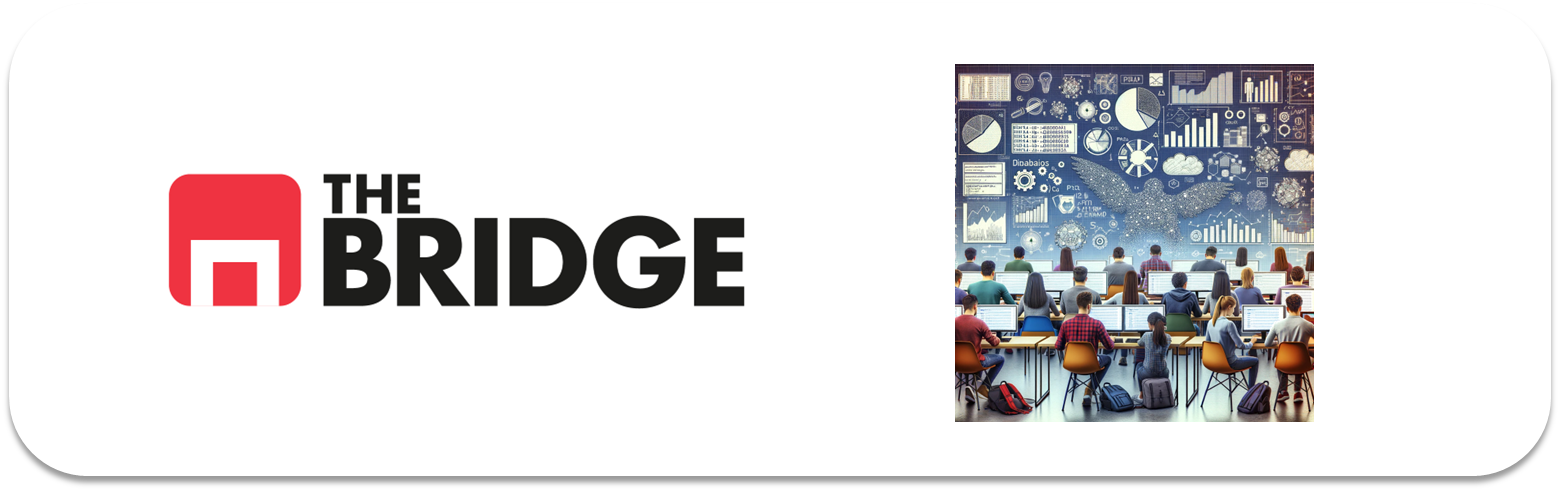

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic. 


In [5]:
df = pd.read_csv('./data/titanic.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.


In [8]:
df['who'] = df['who'].replace({'woman': 1, 'man': 0, 'child': 2})
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

df = df.dropna(subset=['embarked'])
df['embarked'] = df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [9]:
col_to_delete = ['alone', 'alive', 'deck', 'class', 'adult_male', 'embark_town']
df = df.drop(col_to_delete, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    int32  
 8   who       889 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 66.0 KB


3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.


In [11]:
target = 'survived'

<Axes: xlabel='survived', ylabel='count'>

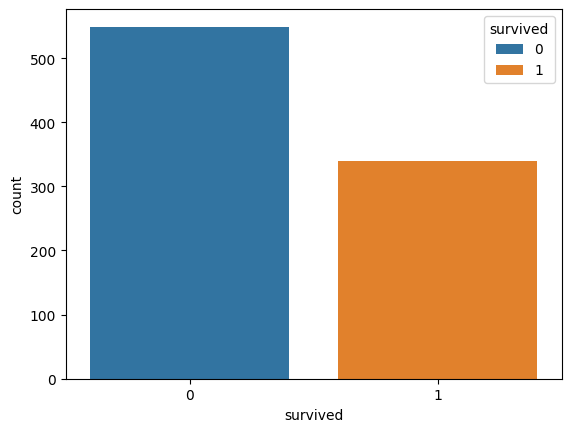

In [12]:
sns.countplot(x= target, data = df, hue = "survived")

In [13]:
df['survived'].value_counts(normalize = True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

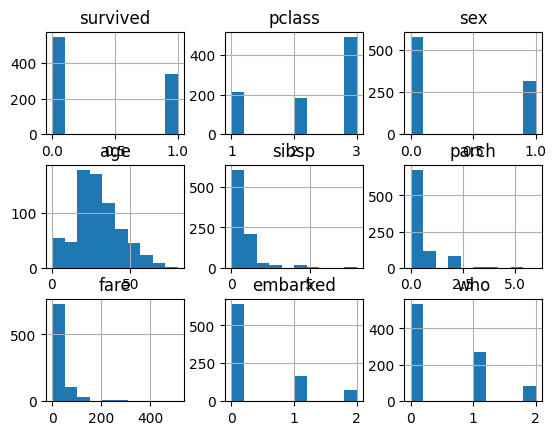

In [14]:
df.hist();


4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.


In [15]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['embarked'])

5. Construye las parejas X,y de train y test.


In [16]:
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]
X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
 

In [17]:
mean_age = X_train['age'].mean()
X_train['age'].fillna(mean_age, inplace=True)

In [18]:
# X_test['age'].fillna(mean_age, inplace=True)

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


In [19]:
corr = train_set.corr(numeric_only=True)

In [20]:
corr[target].sort_values(ascending=False)

survived    1.000000
sex         0.543761
who         0.480289
fare        0.273624
embarked    0.100719
parch       0.082725
sibsp      -0.039553
age        -0.072824
pclass     -0.351612
Name: survived, dtype: float64

In [21]:
np.abs(corr[target]).sort_values(ascending=False)

survived    1.000000
sex         0.543761
who         0.480289
pclass      0.351612
fare        0.273624
embarked    0.100719
parch       0.082725
age         0.072824
sibsp       0.039553
Name: survived, dtype: float64

<Axes: >

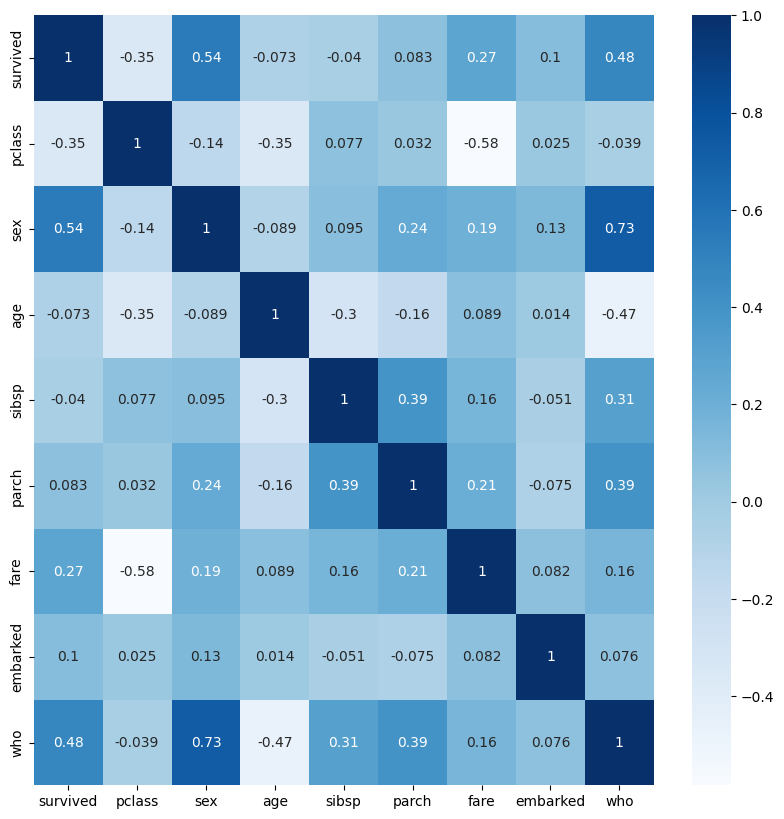

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')

8. Trata las variables para que funcionen lo mejor posible en el modelo.


In [23]:
X_train.describe()

,pclass,sex,age,sibsp,parch,fare,embarked,who
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,2.347398,0.355837,29.658792,0.518987,0.381153,29.769027,0.362869,0.489451
std,0.818099,0.479103,12.586422,1.075655,0.809893,42.688657,0.637314,0.658285
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,29.658792,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000


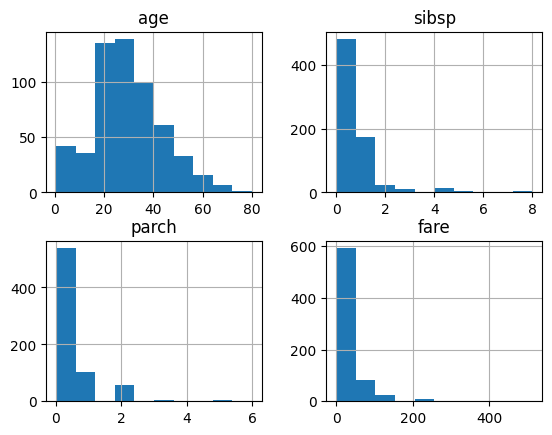

In [24]:
selected_features = ['age', 'sibsp', 'parch', 'fare']

train_set[selected_features].hist()
plt.show()

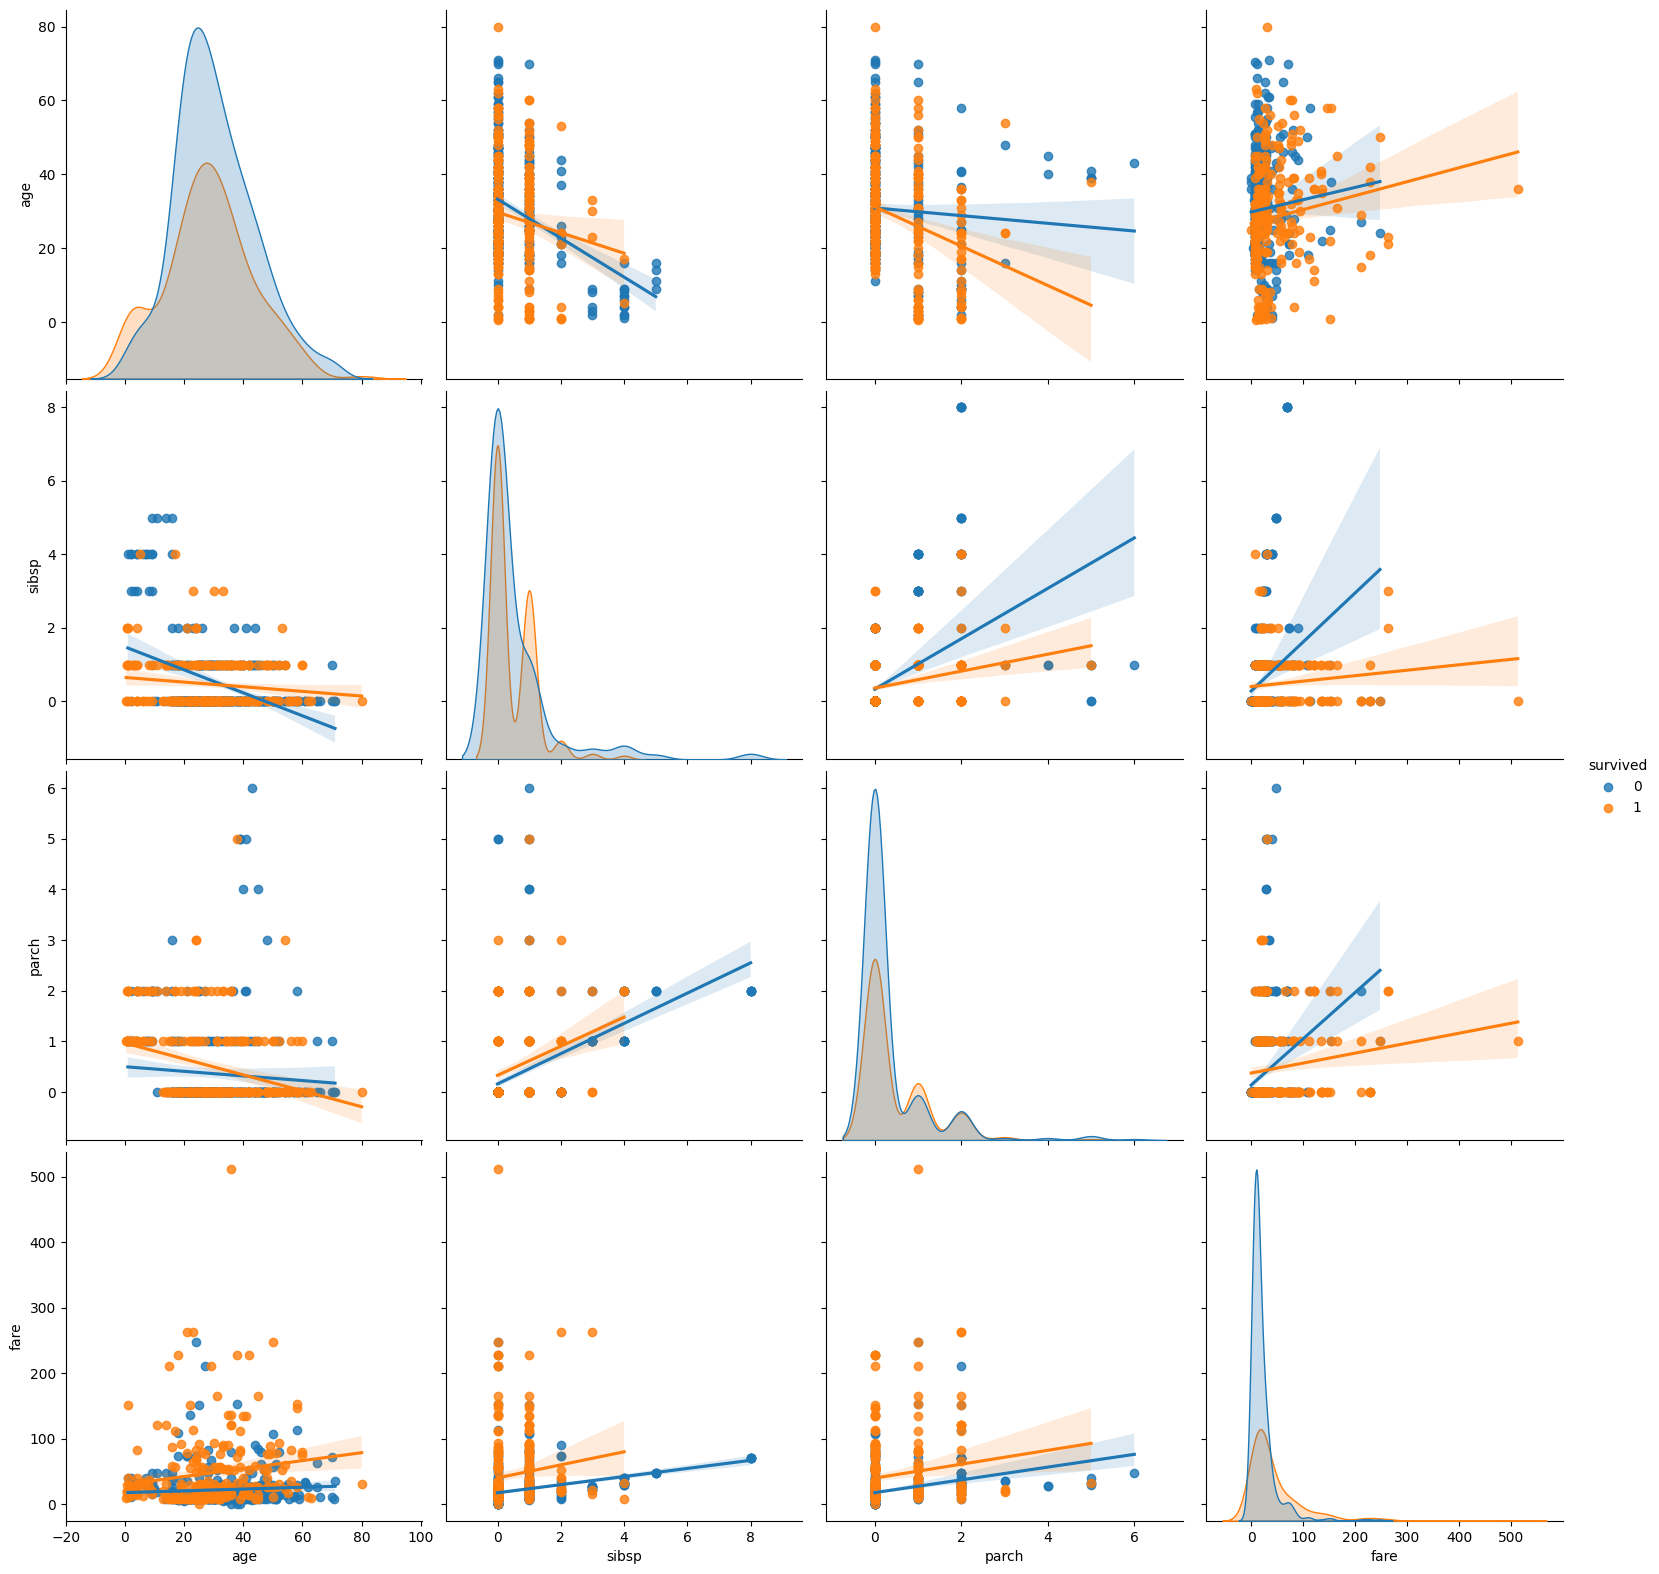

In [25]:
sns.pairplot(train_set,
            hue=target,
            height=4,
            vars=selected_features,
            kind='reg'); # "reg" de regresión lineal

In [26]:
features = train_set.drop(["survived",'embarked', 'age', 'sibsp', 'parch'], axis = 1).columns.to_list()
print(features)

['pclass', 'sex', 'fare', 'who']


9. Construye un modelo de regresión logística.


In [27]:
clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train, y_train) 

LogisticRegression(max_iter=10000)

In [28]:
clf.coef_

array([[-1.03402175,  1.54554409, -0.01300868, -0.50641912, -0.19035789,
         0.00350629,  0.14986624,  1.27908538]])

10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


<Figure size 1000x600 with 0 Axes>

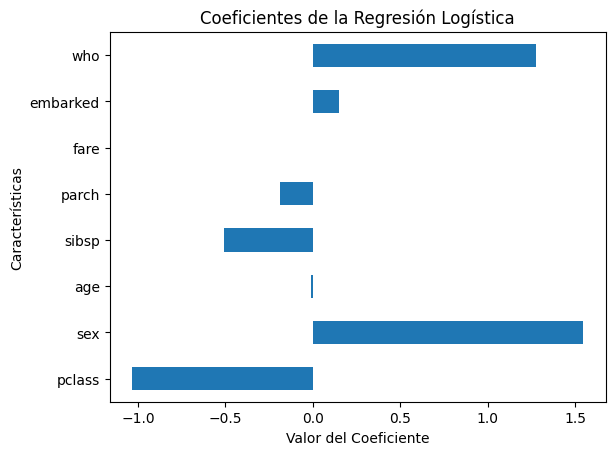

In [37]:
# Crear un DataFrame con los coeficientes
df_coefs = pd.DataFrame(clf.coef_.T, columns=['Coeficientes'])
df_coefs.index = X_train.columns

# Graficar los coeficientes en un solo gráfico de barras horizontal
plt.figure(figsize=(10, 6))
df_coefs.plot(kind="barh", legend=False)
plt.title("Coeficientes de la Regresión Logística")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Características")
plt.show()

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 


In [38]:
X_test['age'].fillna(mean_age, inplace=True)

12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.


In [40]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, clf.predict(X_train))
print(acc_train)

0.819971870604782


In [39]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)


[0.78321678 0.82394366 0.85915493 0.78873239 0.79577465]
Logistic Regression: 0.810164 (0.028222)


In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [42]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [43]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1
Real 0,100,13
Real 1,17,48


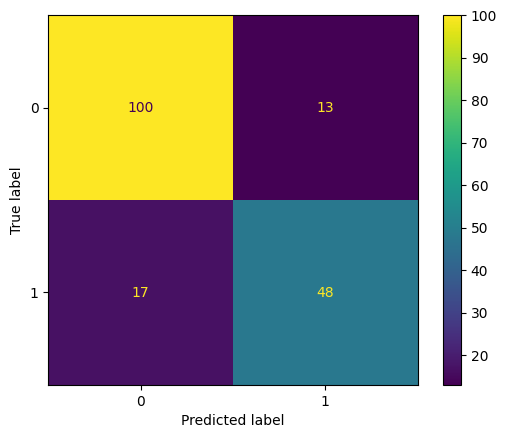

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


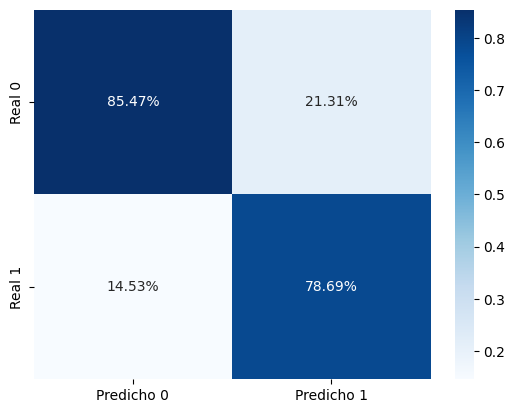

In [45]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [46]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.8314606741573034
MACRO PRECISION: 0.820793050301247
MICRO RECALL: 0.8314606741573034
MACRO RECALL: 0.811708645336964
MICRO ACCURACY: 0.8314606741573034


In [47]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 83.15 %
Error: 16.85 %


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.74      0.76        65

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)


14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report. 